In [1]:
# Input data

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np


raw_out = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
raw_in = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
# t_celsius = [0,1,2,3,4,5]
# t_unknown = [0,3,5,9,13,17]
t_out = torch.tensor(raw_out).unsqueeze(-1)
t_in = torch.tensor(raw_in).unsqueeze(-1)

# Add NN

In [9]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(in_features=1, out_features=11, bias=True)
        self.lin2 = nn.Linear(in_features=11, out_features=100, bias=True)
        self.lin3= nn.Linear(in_features=100, out_features=1, bias=True)
        self.l_relu = nn.LeakyReLU(0.1)
        
    def forward(self, x):
#         return self.lin(x)
#         return self.lin2(F.tanh(self.lin(x)))
        return self.lin3(self.l_relu(self.lin2(F.tanh(self.lin(x)))))

def training_loop(model, optimizer, loss_fn, x, train_outputs, epochs):
    for epoch in range(epochs):
        
        index = torch.randperm(11)
        x = torch.index_select(x,0,index)
        train_outputs = torch.index_select(train_outputs,0,index)
        
        estimates = model(x)
        loss = loss_fn(estimates, train_outputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    return model

# for name, param in model.named_parameters():
#     print(name, param.shape)

In [10]:
model = SimpleModel()
loss_fn = nn.CrossEntropyLoss() 
optimizer = optim.AdamW(model.parameters(), lr=1e-2)
model = training_loop(model, optimizer, nn.MSELoss(), t_in, t_out, 5001)


Epoch 0, Loss 185.172272
Epoch 500, Loss 1.847171
Epoch 1000, Loss 1.736047
Epoch 1500, Loss 1.717155
Epoch 2000, Loss 1.620059
Epoch 2500, Loss 1.536921
Epoch 3000, Loss 1.422655
Epoch 3500, Loss 1.618040
Epoch 4000, Loss 1.139851
Epoch 4500, Loss 1.291600
Epoch 5000, Loss 1.079291


In [11]:
# for name, param in model.named_parameters():
#     print(name, param)

In [12]:
test = torch.zeros(1)
test[0] = 30
test = test.unsqueeze(1)
print(model(test))
with torch.no_grad():
    print(model(test))

tensor([[0.7403]], grad_fn=<AddmmBackward>)
tensor([[0.7403]])


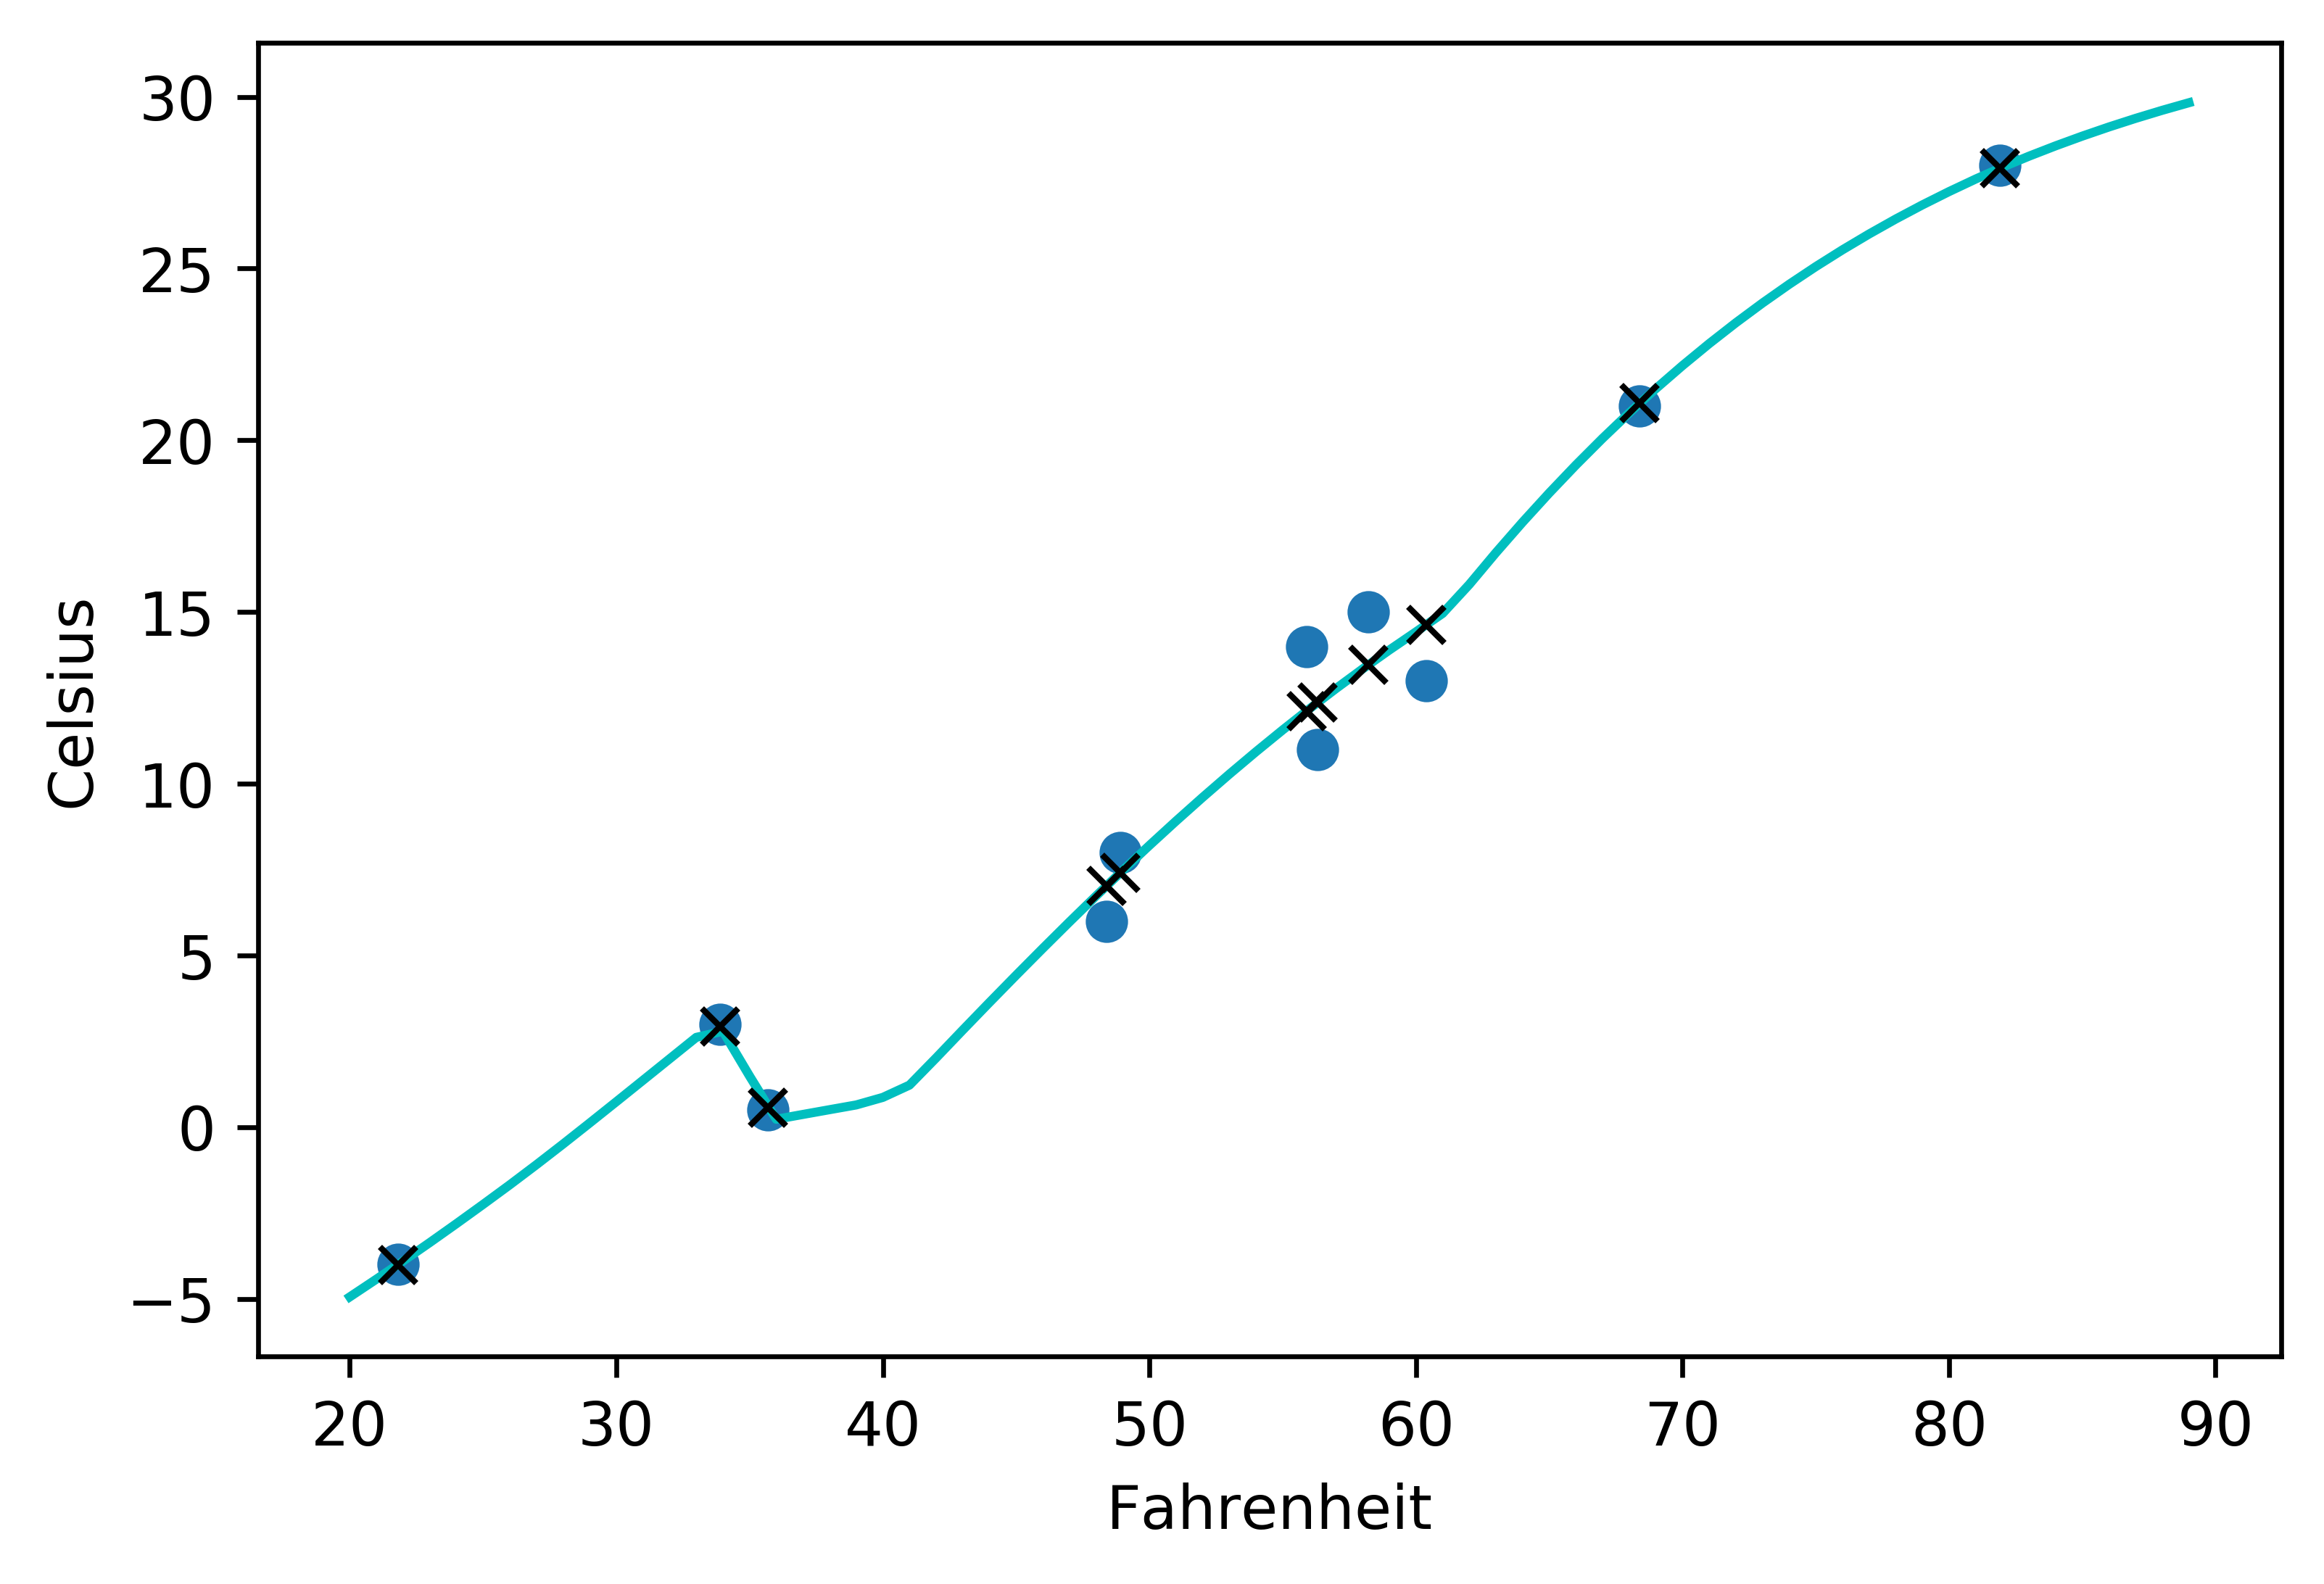

In [13]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_in.numpy(), t_out.numpy(), 'o')
plt.plot(t_range.numpy(), model(t_range).detach().numpy(), 'c-')
plt.plot(t_in.numpy(), model(t_in).detach().numpy(), 'kx')